In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from  sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [10]:
# reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [11]:
# All data preparation steps in this cell

# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')


# create new column: car_company
p = re.compile(r'\w+-?\w+')
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])


# replacing misspelled car_company names
# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'
# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'
# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'
# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'
# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'


# drop carname variable
cars = cars.drop('CarName', axis=1)


# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]
y = cars['price']


# creating dummy variables for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()


# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)


# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)


# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [12]:
# number of features
len(X_train.columns)

68

In [13]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:   44.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [14]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.358365,0.048459,0.006959,0.008596,2,{'n_features_to_select': 2},0.712322,0.673284,0.839691,0.643727,...,0.717492,0.067052,36,0.693638,0.809346,0.768171,0.798515,0.798908,0.773715,0.042337
1,0.312253,0.016184,0.003125,0.006250,3,{'n_features_to_select': 3},0.817568,0.720574,0.864579,0.675851,...,0.706220,0.146467,38,0.796890,0.868796,0.833999,0.850420,0.845840,0.839189,0.023930
2,0.309460,0.018153,0.006245,0.007648,4,{'n_features_to_select': 4},0.829413,0.812420,0.862303,0.735701,...,0.739041,0.150823,33,0.834392,0.904158,0.894407,0.881821,0.850000,0.872956,0.026557
3,0.309187,0.018184,0.006250,0.007655,5,{'n_features_to_select': 5},0.669211,0.814914,0.864962,0.768708,...,0.712257,0.151060,37,0.863963,0.907896,0.897645,0.911010,0.895627,0.895228,0.016692
4,0.385972,0.087934,0.002603,0.003203,6,{'n_features_to_select': 6},0.675174,0.829293,0.873897,0.764830,...,0.718561,0.152295,35,0.864405,0.910425,0.901539,0.912918,0.909751,0.899808,0.018110
5,0.324557,0.019801,0.009376,0.007655,7,{'n_features_to_select': 7},0.619241,0.825256,0.854447,0.765352,...,0.723594,0.118660,34,0.875107,0.913424,0.909011,0.914559,0.926074,0.907635,0.017213
6,0.296311,0.011552,0.000000,0.000000,8,{'n_features_to_select': 8},0.608348,0.827366,0.848157,0.763983,...,0.768626,0.085696,31,0.887177,0.918335,0.924470,0.914797,0.930265,0.915009,0.014886
7,0.355693,0.043697,0.003927,0.006054,9,{'n_features_to_select': 9},0.638207,0.835079,0.848157,0.763969,...,0.773888,0.075171,29,0.889975,0.921886,0.924470,0.914826,0.934186,0.917069,0.014900
8,0.364035,0.022506,0.000000,0.000000,10,{'n_features_to_select': 10},0.637811,0.819335,0.854378,0.763966,...,0.776010,0.075459,27,0.889975,0.925014,0.931169,0.914828,0.939454,0.920088,0.017068
9,0.244328,0.040403,0.003125,0.006250,11,{'n_features_to_select': 11},0.637811,0.859000,0.860012,0.684470,...,0.771157,0.092656,30,0.889975,0.933753,0.936501,0.924168,0.940519,0.924983,0.018315


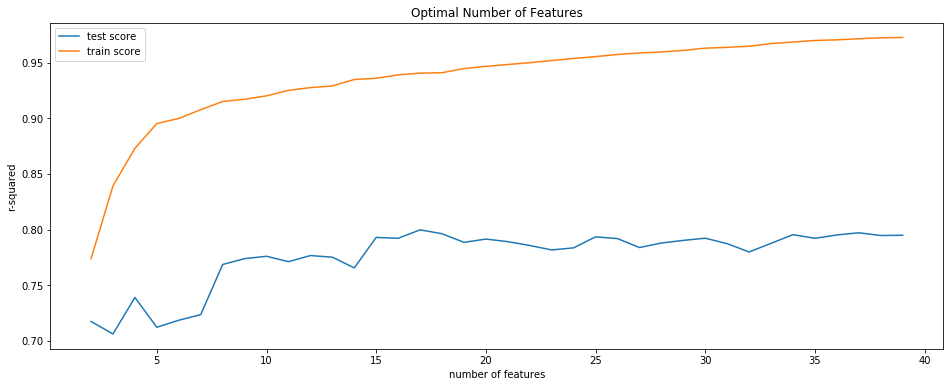

In [15]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')